In [26]:
# cargar las librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats

In [27]:
# cargar el archivo csv y covertirlo en dataframe
df_games = pd.read_csv('/datasets/games.csv')

In [28]:
# mostrar los datos para estudiar la información general 
df_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [29]:
# Reemplaza los nombres de las columnas (ponlos en minúsculas).
df_games.columns = df_games.columns.str.lower()
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [30]:
# mostrar la informacion del dataframe para conocer el tipo de dato de cada columna.
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [31]:
# Convertir year_of_release a Int64
df_games['year_of_release'] = df_games['year_of_release'].astype('Int64')

# Convertir critic_score a Int64, ya que representa puntuaciones enteras
df_games['critic_score'] = df_games['critic_score'].astype(float)

# Convertir user_score a float, manejando valores no numéricos
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')

# Verificar los cambios
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


- Viendo la información del DataFrame, hay varias columnas con valores nulos:

1. name y genre: Son datos categóricos y faltan pocos valores, lo que podría deberse a errores en la recopilación.
2. year_of_release: Puede faltar porque algunos juegos antiguos no tienen una fecha clara de lanzamiento.
3. critic_score y user_score: Muchas veces estos valores no están disponibles porque el juego no fue calificado o la plataforma aún no tenía datos suficientes.
4. rating: Puede estar ausente si un juego no recibió una clasificación oficial.

In [32]:
# name y genre: Dado que hay pocos valores nulos, se pueden eliminar estas filas para evitar datos incompletos.
df_games.dropna(subset=['name', 'genre'], inplace=True)

- year_of_release: Se puede dejar en blanco (NaN) porque imputarlo con la mediana o moda podría distorsionar los datos.

- critic_score y user_score:
Reemplazar 'tbd' en user_score con NaN porque significa "por determinar".
Mantener los valores NaN sin rellenar, ya que promediar puntuaciones podría generar sesgos.

In [33]:
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [34]:
# rating: Se puede rellenar con "Unknown" para indicar que no tiene clasificación.
df_games['rating'].fillna('Unknown', inplace=True)
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown


In [35]:
df_games['total_sales'] = df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df_games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38


In [36]:
# Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
games_per_year = df_games['year_of_release'].value_counts().sort_index()
print(games_per_year)

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


- En los años 80, el número de lanzamientos era bajo, con menos de 50 juegos por año. Esto coincide con la era temprana de los videojuegos y la crisis de la industria en 1983-1984.
- A partir de 1994, los lanzamientos aumentan significativamente.
- Entre 2002 y 2008, la cantidad de juegos lanzados se dispara, superando los 1000 títulos en 2006 y alcanzando un pico en 2008 (1427 juegos).

In [37]:
# Calcular ventas totales por plataforma
platform_sales = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(platform_sales)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64


In [38]:
# Identificar plataformas que solían ser populares pero ya no tienen ventas
active_years = df_games.groupby('platform')['year_of_release'].agg(['min', 'max'])
print(active_years)

           min   max
platform            
2600      1980  1989
3DO       1994  1995
3DS       2011  2016
DC        1998  2008
DS        1985  2013
GB        1988  2001
GBA       2000  2007
GC        2001  2007
GEN       1990  1994
GG        1992  1992
N64       1996  2002
NES       1983  1994
NG        1993  1996
PC        1985  2016
PCFX      1996  1996
PS        1994  2003
PS2       2000  2011
PS3       2006  2016
PS4       2013  2016
PSP       2004  2015
PSV       2011  2016
SAT       1994  1999
SCD       1993  1994
SNES      1990  1999
TG16      1995  1995
WS        1999  2001
Wii       2006  2016
WiiU      2012  2016
X360      2005  2016
XB        2000  2008
XOne      2013  2016


In [39]:
# Ciclo de vida de las plataformas (tiempo de aparición y desaparición)
active_years['lifespan'] = active_years['max'] - active_years['min']
print(f"El promedio de años de vida de las plataformas es: {active_years['lifespan'].mean():.2f} años")

El promedio de años de vida de las plataformas es: 7.61 años


1. Plataformas con mayores ventas:

- PS2, X360, PS3 y Wii fueron las consolas más exitosas en términos de ventas totales, superando los 900 millones de unidades vendidas en todas las regiones.
- PS4 y XOne, aunque recientes, aún no alcanzaban esas cifras en el período analizado (hasta 2016).

2. Plataformas que solían ser populares pero ya no tienen ventas:

- Consolas clásicas como Atari 2600, NES, SNES, N64, GameCube y Sega Genesis dominaron en sus épocas, pero dejaron de producirse hace años.
- Dreamcast (DC) y Sega Saturn (SAT) tuvieron una vida corta, lo que indica una baja aceptación en el mercado.

3. Ciclo de vida promedio de las plataformas:

- 7.61 años es el tiempo promedio de vida útil de una plataforma, lo que sugiere que la mayoría de las consolas duran entre 6 y 10 años antes de ser reemplazadas por una nueva generación.
- Excepciones como PS2 (11 años) y NES (11 años) lograron mantenerse activas por más tiempo, lo que refleja su impacto en la industria.

4. Lanzamiento y desaparición de plataformas:

- Las consolas de Nintendo y PlayStation han mantenido ciclos de vida estables, con nuevas generaciones apareciendo cada 5-7 años.
- Microsoft entró más tarde al mercado (con Xbox en 2001), pero sigue una tendencia similar con lanzamientos cada 7-8 años.
- Algunas plataformas como 3DO, TurboGrafx-16 y PC-FX desaparecieron rápidamente, probablemente por baja adopción y competencia.

# Para construir un modelo que prediga 2017, lo más recomendable es tomar datos de los últimos 5-10 años, priorizando la información más reciente.

- Opción más precisa: 2012-2016 Refleja las tendencias actuales del mercado.
- Opción con más contexto: 2007-2016 Incluye una generación previa de consolas para capturar patrones de transición.

In [40]:
# Calcular ventas totales por plataforma
platform_sales = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

# Seleccionar las 5 plataformas con mayores ventas totales
top_platforms = platform_sales.head(5)
top_platforms.head(5)

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_sales, dtype: float64

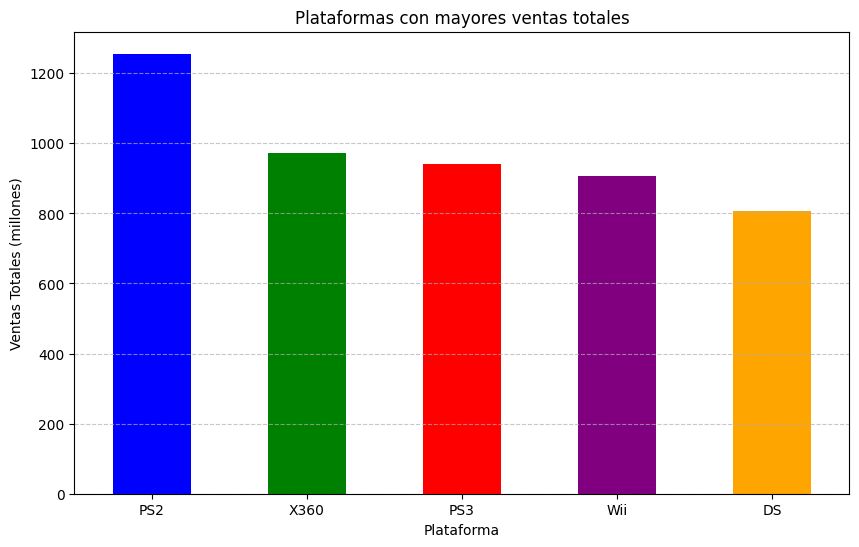

In [41]:
# Graficar las ventas de las plataformas líderes
plt.figure(figsize=(10, 6))
top_platforms.plot(kind='bar', color=['blue', 'green', 'red', 'purple', 'orange'])

plt.title('Plataformas con mayores ventas totales')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (millones)')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# Conclusiones sobre las plataformas líderes en ventas
1. PS2 domina las ventas con más de 1250 millones de unidades, consolidándose como la consola más vendida de la historia.

2.  X360 y PS3 están a la par, con aproximadamente 970 y 940 millones de ventas, respectivamente. Ambas plataformas tuvieron una fuerte competencia durante su ciclo de vida.

3. Wii y DS también fueron exitosas, alcanzando 907 y 806 millones de ventas, lo que refleja el impacto de Nintendo en el mercado.

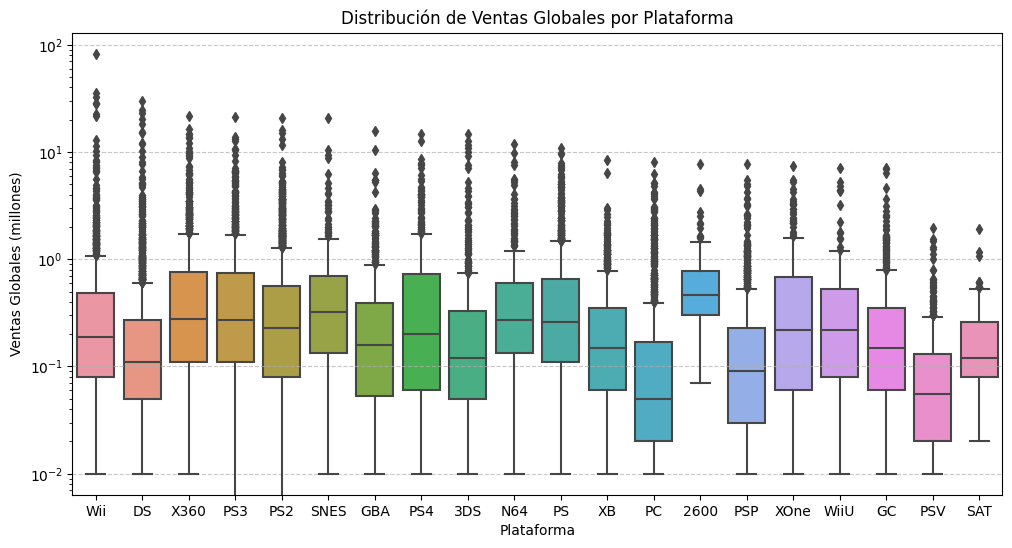

In [42]:
# Diagrama de caja para las ventas globales de todos los juegos

# Filtrar plataformas con un número significativo de juegos
platform_counts = df_games['platform'].value_counts()
top_platforms = platform_counts[platform_counts > 100].index  # Filtramos plataformas con más de 100 juegos
filtered_df = df_games[df_games['platform'].isin(top_platforms)]

# Crear el diagrama de caja
plt.figure(figsize=(12, 6))
sns.boxplot(x='platform', y='total_sales', data=filtered_df)
plt.yscale('log')  # Escala logarítmica para visualizar mejor los datos

plt.title('Distribución de Ventas Globales por Plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


1. Diferencias significativas en ventas
- El diagrama de caja revela que algunas plataformas tienen ventas medianas y máximas mucho mayores que otras. PS2, X360, PS3 y Wii, por ejemplo, muestran valores atípicos (outliers) con juegos que vendieron millones de copias.

2. Distribución desigual
- La mayoría de los juegos tienen ventas bajas, con solo unos pocos títulos alcanzando cifras extraordinarias. Esto sugiere que el éxito de una plataforma depende de unos pocos juegos "superventas" en lugar de un gran volumen de juegos con ventas moderadas.

3. Plataformas con ventas más estables
- Algunas plataformas, como DS y PS4, muestran menos dispersión en las ventas, lo que indica una distribución más uniforme entre los juegos publicados.

4. Promedio de ventas por plataforma
- Las plataformas con más juegos publicados suelen tener ventas promedio más bajas debido a la competencia y a la presencia de muchos títulos con pocas ventas. En cambio, plataformas con menos juegos pueden tener ventas promedio más altas si la mayoría de sus títulos fueron éxitos.

# Cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección).

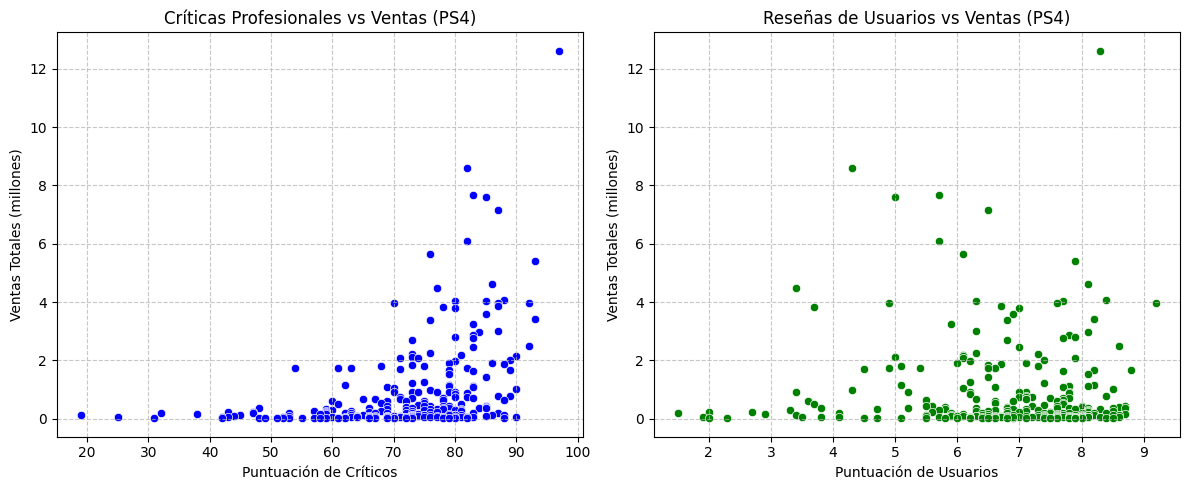

Correlación entre críticas profesionales y ventas: 0.41
Correlación entre reseñas de usuarios y ventas: -0.03


In [43]:
# Elegir una plataforma popular (ejemplo: PS4)
platform_selected = 'PS4'
df_platform = df_games[df_games['platform'] == platform_selected]

# Eliminar valores nulos en reseñas y ventas
df_platform = df_platform.dropna(subset=['critic_score', 'user_score', 'total_sales'])

# Calcular correlaciones
correlation_critic = df_platform['critic_score'].corr(df_platform['total_sales'])
correlation_user = df_platform['user_score'].corr(df_platform['total_sales'])

# Crear gráficos de dispersión
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de críticas profesionales vs ventas
sns.scatterplot(x=df_platform['critic_score'], y=df_platform['total_sales'], ax=ax[0], color='blue')
ax[0].set_title(f'Críticas Profesionales vs Ventas ({platform_selected})')
ax[0].set_xlabel('Puntuación de Críticos')
ax[0].set_ylabel('Ventas Totales (millones)')
ax[0].grid(True, linestyle='--', alpha=0.7)

# Gráfico de reseñas de usuarios vs ventas
sns.scatterplot(x=df_platform['user_score'], y=df_platform['total_sales'], ax=ax[1], color='green')
ax[1].set_title(f'Reseñas de Usuarios vs Ventas ({platform_selected})')
ax[1].set_xlabel('Puntuación de Usuarios')
ax[1].set_ylabel('Ventas Totales (millones)')
ax[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Imprimir correlaciones
print(f'Correlación entre críticas profesionales y ventas: {correlation_critic:.2f}')
print(f'Correlación entre reseñas de usuarios y ventas: {correlation_user:.2f}')

#  La relación entre reseñas y ventas (PS4)

1. Las críticas profesionales tienen una correlación moderada con las ventas

- La correlación de 0.41 indica que los juegos con mejores puntuaciones de los críticos tienden a vender más.
- Aunque no es una relación perfecta, sí sugiere que una buena crítica puede influir positivamente en las ventas.
- En el gráfico, se observa una tendencia ascendente: muchos de los juegos con altas ventas tienen puntuaciones altas de críticos.

2. Las reseñas de usuarios no tienen un impacto significativo en las ventas

- La correlación de -0.03 es casi nula, lo que indica que no hay una relación clara entre la puntuación de los usuarios y las ventas.
- En el gráfico, las ventas parecen estar dispersas sin importar la calificación de los usuarios.
- Esto podría deberse a que las opiniones de los jugadores son más subjetivas y variadas, mientras que las de los críticos siguen ciertos estándares.

Correlaciones entre críticas y ventas por plataforma:
platform
PC      0.525902
PS4     0.571301
XOne    0.446161
Name: (critic_score, user_score), dtype: float64


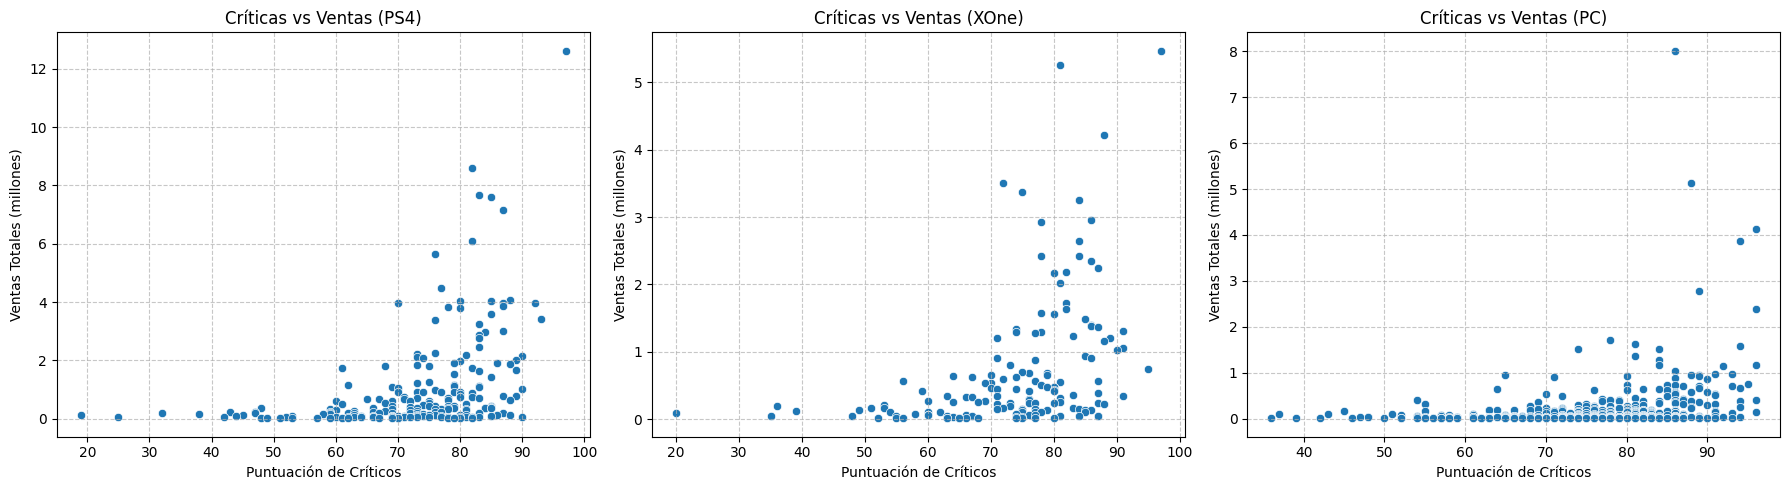

In [44]:
# Filtrar juegos que están en múltiples plataformas
df_multiplatform = df_games[df_games.duplicated(subset=['name'], keep=False)]

# Seleccionar plataformas relevantes (ejemplo: PS4, Xbox One, PC)
platforms_selected = ['PS4', 'XOne', 'PC']
df_selected = df_multiplatform[df_multiplatform['platform'].isin(platforms_selected)]

# Eliminar valores nulos en reseñas y ventas
df_selected = df_selected.dropna(subset=['critic_score', 'user_score', 'total_sales'])

# Calcular correlaciones por plataforma
correlations = df_selected.groupby('platform')[['critic_score', 'user_score', 'total_sales']].corr().unstack().iloc[:,1]
print("Correlaciones entre críticas y ventas por plataforma:")
print(correlations)

# Gráficos de dispersión de críticas vs ventas por plataforma
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, platform in enumerate(platforms_selected):
    df_platform = df_selected[df_selected['platform'] == platform]
    sns.scatterplot(x=df_platform['critic_score'], y=df_platform['total_sales'], ax=axes[i])
    axes[i].set_title(f'Críticas vs Ventas ({platform})')
    axes[i].set_xlabel('Puntuación de Críticos')
    axes[i].set_ylabel('Ventas Totales (millones)')
    axes[i].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Análisis de coorrelaciones criticas. 

1. Relación entre críticas y ventas

- La correlación más fuerte entre puntuaciones de críticos y ventas se da en PS4 (0.57), seguida de PC (0.53) y Xbox One (0.45).
- Esto sugiere que, en general, los juegos mejor calificados por los críticos tienden a vender más en todas las plataformas, pero este efecto es más pronunciado en PS4.

2. Diferencias entre plataformas

- En PS4, las críticas parecen influir más en las ventas, posiblemente por una base de jugadores más amplia y receptiva a las opiniones profesionales.
- En PC, la relación sigue siendo alta, pero puede haber más factores influyentes, como precios en tiendas digitales o mods.
- En Xbox One, la correlación es la más baja, lo que indica que los jugadores pueden basar su compra en otros factores como exclusividad o franquicias.

3. Distribución de ventas

- El gráfico muestra que, aunque los juegos mejor calificados venden más en promedio, hay muchos títulos con bajas ventas incluso con buenas críticas.
- Esto podría significar que otros factores como marketing, exclusividad y precio también afectan el éxito de un juego.

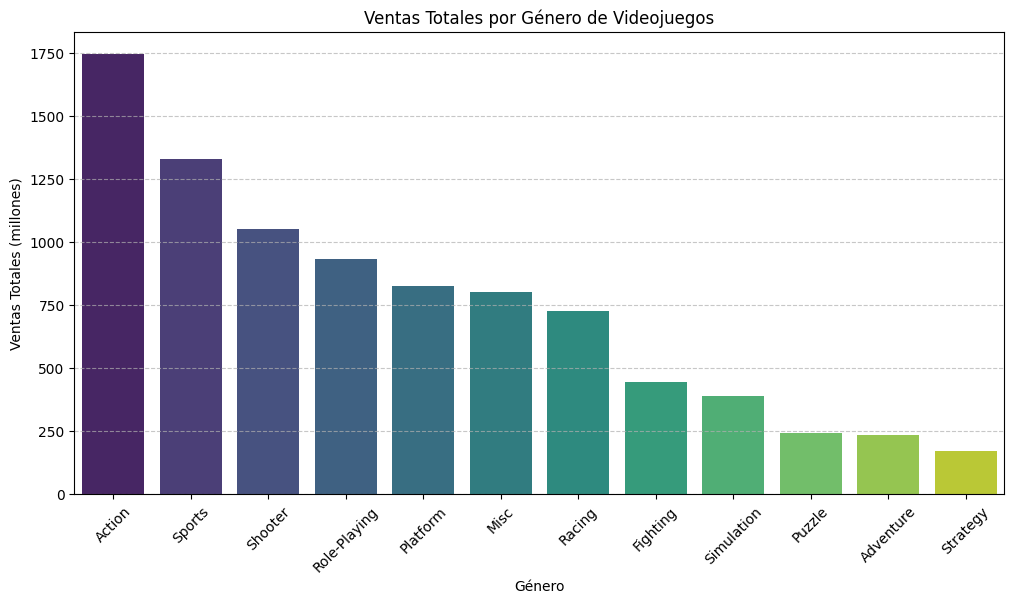

In [45]:
# Distribución general de los juegos por género. Para evaluar los géneros más rentables.

# Agrupar por género y calcular ventas totales
genre_sales = df_games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

# Graficar la distribución de ventas por género
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Género')
plt.ylabel('Ventas Totales (millones)')
plt.title('Ventas Totales por Género de Videojuegos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Conclusiones sobre los géneros más rentables

1. Los géneros con más ventas

- Acción y Deportes suelen ser los más vendidos, ya que incluyen franquicias masivas como Call of Duty, FIFA o Madden.
- Shooter también destaca, impulsado por títulos como Halo, Battlefield y Call of Duty.
- Rol (RPG) tiene fuertes ventas, especialmente en plataformas como PC y consolas con sagas como The Witcher, Final Fantasy y Pokémon.


2. Géneros con ventas más bajas

- Puzles y Estrategia suelen vender menos, posiblemente porque tienen un público más de nicho y menos marketing.
- Simulación (excepto algunos títulos como The Sims o Animal Crossing) generalmente tiene ventas más bajas en comparación con otros géneros.

In [46]:
# Plataformas principales por región


# Seleccionar columnas de ventas por región
regions = ['na_sales', 'eu_sales', 'jp_sales']
platform_sales = df_games.groupby('platform')[regions].sum()

# Obtener el top 5 de plataformas por región
top_platforms = {region: platform_sales[region].nlargest(5) for region in regions}

# Mostrar resultados
for region, platforms in top_platforms.items():
    print(f"\nTop 5 plataformas en {region.upper()}:\n{platforms}")


Top 5 plataformas en NA_SALES:
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Top 5 plataformas en EU_SALES:
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Top 5 plataformas en JP_SALES:
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


In [47]:
# Géneros principales por región

# Ventas totales por género en cada región
genre_sales = df_games.groupby('genre')[regions].sum()

# Obtener el top 5 de géneros por región
top_genres = {region: genre_sales[region].nlargest(5) for region in regions}

# Mostrar resultados
for region, genres in top_genres.items():
    print(f"\nTop 5 géneros en {region.upper()}:\n{genres}")


Top 5 géneros en NA_SALES:
genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Top 5 géneros en EU_SALES:
genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Top 5 géneros en JP_SALES:
genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64



Ventas por clasificación ESRB en cada región:
         na_sales  eu_sales  jp_sales
rating                               
AO           1.26      0.61      0.00
E         1292.99    710.25    198.11
E10+       353.32    188.52     40.20
EC           1.53      0.11      0.00
K-A          2.56      0.27      1.46
M          748.48    483.97     64.24
RP           0.00      0.08      0.00
T          759.75    427.03    151.40
Unknown   1240.68    613.30    841.93


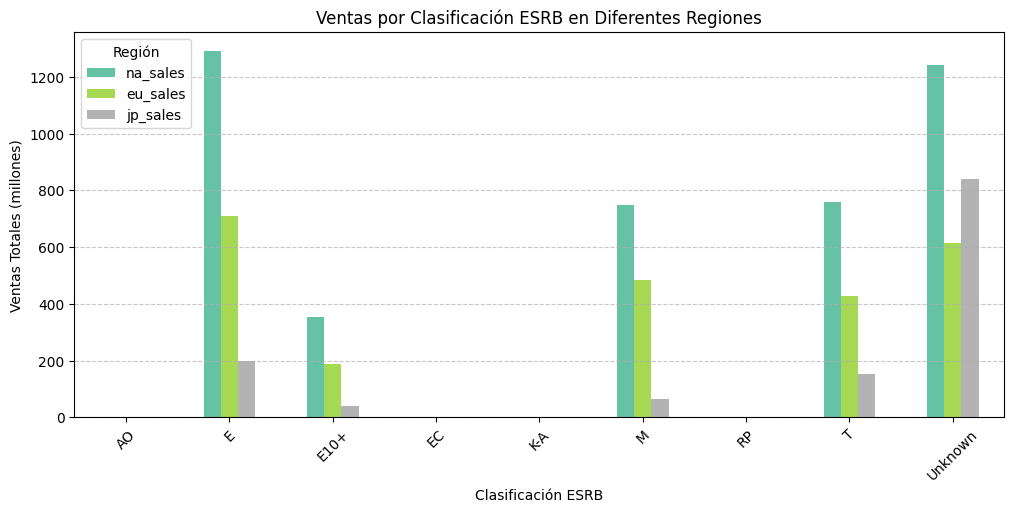

In [48]:
# Impacto de las clasificaciones ESRB en las ventas

# Filtrar solo las ventas por región y clasificación ESRB
rating_sales = df_games.groupby('rating')[regions].sum()

# Mostrar los datos
print("\nVentas por clasificación ESRB en cada región:")
print(rating_sales)

# Visualizar con un gráfico
rating_sales.plot(kind='bar', figsize=(12, 5), colormap="Set2")
plt.title("Ventas por Clasificación ESRB en Diferentes Regiones")
plt.ylabel("Ventas Totales (millones)")
plt.xlabel("Clasificación ESRB")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Región")
plt.show()

# Plataformas principales por región
- Norteamérica (NA): Xbox 360, PS2 y Wii dominan las ventas. Hay una fuerte presencia de consolas de Microsoft y Sony.
- Europa (EU): PS2 y PS3 lideran, pero el mercado está más equilibrado entre PlayStation y Xbox.
- Japón (JP): Prefiere portátiles y consolas de Nintendo y Sony, como DS, PS1 y SNES. Xbox no aparece en el ranking.

# Géneros principales por región
- Norteamérica (NA): Acción, deportes y shooters lideran. El género "Platform" también tiene alta presencia.
- Europa (EU): Acción y deportes son los más populares, con una fuerte presencia de shooters y juegos de carreras.
- Japón (JP): Role-Playing (RPG) es el líder absoluto, seguido de acción y deportes.

# Impacto de la clasificación ESRB en las ventas
- NA y EU: Las clasificaciones E (Everyone) y M (Mature) tienen las mayores ventas.
- JP: También vende más en la categoría E, pero tiene más ventas en la categoría T (Teen) comparado con otras regiones.
- Unknown: Muchas ventas están en esta categoría, lo que podría indicar que varios juegos no tienen clasificación ESRB o están fuera de EE.UU.

## *Hipótesis: Calificaciones de usuarios en Xbox One y PC*

# *Formulación de hipótesis*

- Hipótesis nula: Las calificaciones promedio de los usuarios en Xbox One y PC son iguales.
- Hipótesis alternativa: Las calificaciones promedio de los usuarios en Xbox One y PC son diferentes.

In [49]:
# Evaluación de hipótesis con alfa = 0.05
alpha = 0.05

# Filtrar las calificaciones de usuario por plataforma
xbox_scores = df_games[df_games['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df_games[df_games['platform'] == 'PC']['user_score'].dropna()

# Prueba t para Xbox One vs PC
t_stat1, p_value1 = stats.ttest_ind(xbox_scores, pc_scores, equal_var=False)

# Imprimir resultados
print("Prueba t para Xbox One vs PC:")
print(f"t-statistic = {t_stat1:.4f}, p-value = {p_value1:.4f}")

if p_value1 < alpha:
    print("Rechazamos H0: Las calificaciones de Xbox One y PC son diferentes.")
else:
    print("No se rechaza H0: No hay evidencia suficiente para decir que son diferentes.")

Prueba t para Xbox One vs PC:
t-statistic = -4.6534, p-value = 0.0000
Rechazamos H0: Las calificaciones de Xbox One y PC son diferentes.


 **Comparación de calificaciones entre Xbox One y PC**
- Resultado: p-value = 0.0000, por lo que rechazamos H0.

- Conclusión: Hay una diferencia estadísticamente significativa en las calificaciones de los usuarios entre Xbox One y PC. Esto indica que los jugadores perciben los juegos en estas plataformas de manera diferente.

## *Hipótesis: Diferencia en calificaciones entre Acción y Deportes*

# *Formulación de hipótesis*
- Hipótesis nula: Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son iguales.
- Hipótesis alternativa: Las calificaciones promedio de los usuarios para los géneros Acción y Deportes son diferentes.

In [50]:
# Evaluación de hipótesis con alfa = 0.05
alpha = 0.05

# Filtrar las calificaciones de usuario por género
action_scores = df_games[df_games['genre'] == 'Action']['user_score'].dropna()
sports_scores = df_games[df_games['genre'] == 'Sports']['user_score'].dropna()

# Prueba t para Acción vs Deportes
t_stat2, p_value2 = stats.ttest_ind(action_scores, sports_scores, equal_var=False)


print("Prueba t para Acción vs Deportes:")
print(f"t-statistic = {t_stat2:.4f}, p-value = {p_value2:.4f}")

if p_value2 < alpha:
    print("Rechazamos H0: Las calificaciones de Acción y Deportes son diferentes.")
else:
    print("No se rechaza H0: No hay evidencia suficiente para decir que son diferentes.")

Prueba t para Acción vs Deportes:
t-statistic = 1.5775, p-value = 0.1148
No se rechaza H0: No hay evidencia suficiente para decir que son diferentes.


**Comparación de calificaciones entre los géneros Acción y Deportes**
- Resultado: p-value = 0.1148, por lo que no se rechaza H0.

- Conclusión: No hay suficiente evidencia para decir que las calificaciones promedio de los juegos de Acción y Deportes sean diferentes. En otras palabras, los jugadores valoran estos géneros de manera similar en términos de calificación.

# *Conclusión general del ejercicio*

*Desde la preparación de los datos, organice y limpie la información para obtener información clara sobre las plataformas, géneros y clasificaciones de juegos en distintas regiones.*

*El análisis de ventas mostró que las preferencias varían según la región: en América del Norte dominan Xbox y shooters, en Europa PlayStation y juegos de acción, mientras que en Japón destacan Nintendo y los RPGs. Además, las clasificaciones ESRB influyen en las ventas, con una clara preferencia por juegos E y M en Occidente, y una mayor proporción de ventas con clasificación desconocida en Japón.*

*Finalmente, las pruebas de hipótesis indicaron que las calificaciones de los usuarios sí varían entre Xbox One y PC, pero no hay una diferencia significativa entre los géneros Acción y Deportes.*